In [301]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [302]:
df= pd.read_csv("titanic_train.csv").replace("male",0).replace("female",1)

In [303]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [304]:
ip = df.interpolate(method='linear')

In [305]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [306]:
class_mapping = {'C': 0, 'Q': 1, 'S': 2}
class_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [307]:
ip['Embarked'] = ip['Embarked'].map(class_mapping)

In [308]:
ip.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [309]:
df2 = ip.dropna(subset=['Embarked'])

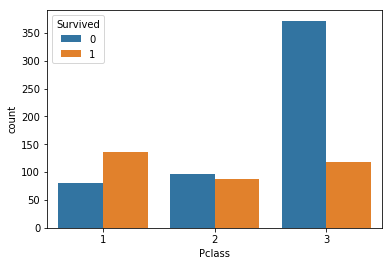

In [310]:
sns.countplot(x = "Pclass",data=ip, hue="Survived")

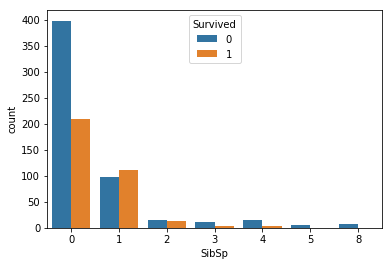

In [311]:
sns.countplot(x = "SibSp",data=ip, hue="Survived")

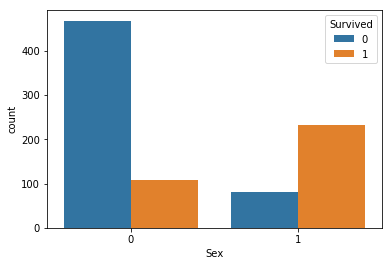

In [312]:
sns.countplot(x = "Sex",data=ip, hue="Survived")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 12.,   3.,   6.,  13.,   3.,  19.,  33.,  54.,  49.,  48.,  51.,
          48.,  30.,  36.,  32.,  17.,  24.,  16.,  10.,   9.,  10.,   4.,
           7.,   4.,   5.,   0.,   5.,   1.,   0.,   0.]),
  array([ 33.,  14.,  11.,  17.,   8.,  35.,  50.,  75.,  82.,  65.,  83.,
          81.,  46.,  63.,  51.,  28.,  34.,  25.,  21.,  15.,  16.,   9.,
           9.,   8.,   5.,   0.,   5.,   1.,   0.,   1.])],
 array([  0.42      ,   3.07266667,   5.72533333,   8.378     ,
         11.03066667,  13.68333333,  16.336     ,  18.98866667,
         21.64133333,  24.294     ,  26.94666667,  29.59933333,
         32.252     ,  34.90466667,  37.55733333,  40.21      ,
         42.86266667,  45.51533333,  48.168     ,  50.82066667,
         53.47333333,  56.126     ,  58.77866667,  61.43133333,
         64.084     ,  66.73666667,  69.38933333,  72.042     ,
         74.69466667,  77.34733333,  80.        ]),
 <a list of 2 Lists of Patches objects>)

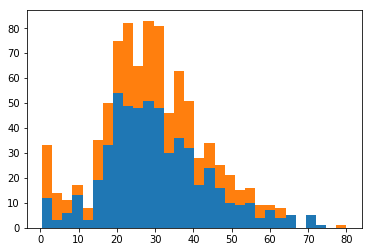

In [313]:
split_data = []
for survived in [0,1]:
    split_data.append(ip[ip.Survived==survived])

temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=30)

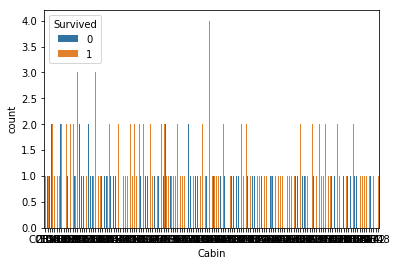

In [314]:
sns.countplot(x = "Cabin",data=ip, hue="Survived")

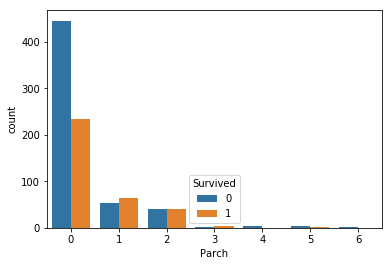

In [315]:
sns.countplot(x = "Parch",data=ip, hue="Survived")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 468.,   45.,   22.,    5.,    3.,    0.,    3.,    3.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 687.,   90.,   61.,   22.,   11.,    0.,    9.,    8.,    0.,
            0.,    0.,    0.,    0.,    0.,    3.])],
 array([   0.     ,   34.15528,   68.31056,  102.46584,  136.62112,
         170.7764 ,  204.93168,  239.08696,  273.24224,  307.39752,
         341.5528 ,  375.70808,  409.86336,  444.01864,  478.17392,
         512.3292 ]),
 <a list of 2 Lists of Patches objects>)

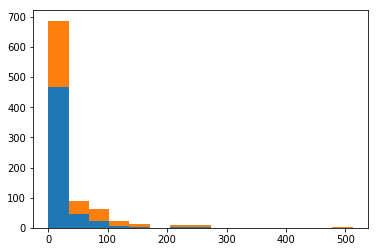

In [316]:
split_data = []
for survived in [0,1]:
    split_data.append(ip[ip.Survived==survived])

temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=15)

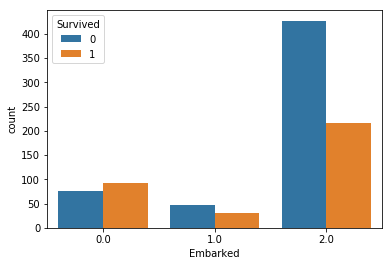

In [317]:
sns.countplot(x = "Embarked",data=df2, hue="Survived")

In [468]:
X = df2.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp']].values
y = df2.loc[:,['Survived']].values

In [469]:
y = y.reshape((1,-1))[0]

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [471]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [472]:
print('train accuracy: %.3f' % gbct.score(X_train, y_train))
print('test  accuracy: %.3f' % gbct.score(X_test, y_test))

train accuracy: 0.921
test  accuracy: 0.801


In [473]:
#予測

In [488]:
Df = pd.read_csv('titanic_test.csv').replace("male",0).replace("female",1)

In [489]:
Ip = Df.interpolate(method='linear')

In [490]:
pd.get_dummies(Df['Embarked']).head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [491]:
class_mapping = {'C': 0, 'Q': 1, 'S': 2}
class_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [492]:
Ip['Embarked'] = Ip['Embarked'].map(class_mapping)

In [493]:
X_1 = Df2.loc[:,['Pclass','Sex', 'Age','SibSp','Fare','Embarked']].values

In [494]:
y_pred = gbct.predict(X_1)

In [495]:
kaggle_df = pd.DataFrame({"PassengerId":Df["PassengerId"], "Survived":y_pred})

In [497]:
kaggle_df.to_csv("課題２_titanic", index=False)